In [8]:
import pandas as pd
df =pd.read_csv("/Users/souadmouajel/Desktop/Ironhack/lab-sessions/week-5/day-2/amz_uk_price_prediction_dataset.csv")

In [4]:
import os
print(os.listdir())

['Untitled.ipynb', '2.EDA_bivariate_students_ok.ipynb', 'amz_uk_price_prediction_dataset.csv', '.ipynb_checkpoints', '2.EDA_bivariate_answers.ipynb', 'lab-eda-bivariate']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [26]:
# Are there categories where being a best-seller is more prevalent?

# Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on 
#this proportion in descending order.

In [22]:
# Generating a crosstab for  between the product category and the isBestSeller status.
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result
sorted_crosstab = crosstab_result.sort_values(by=True, ascending=False).head(20)
sorted_crosstab

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
Beauty,19010,302
Pet Supplies,9152,285
Arts & Crafts,9319,230
Women,17559,213


In [24]:
# Statistical Tests:

# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
# Compute Cramér's V to understand the strength of association between best-seller status and category.

In [29]:
from scipy.stats import chi2_contingency

# Chi-square test for 'category' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, expected_freq = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value, expected_freq

(36540.20270061387,
 0.0,
 array([[2.47190130e+02, 8.09870149e-01],
        [4.05371878e+03, 1.32812173e+01],
        [2.49183599e+02, 8.16401360e-01],
        [1.69145827e+03, 5.54173243e+00],
        [2.53170536e+02, 8.29463782e-01],
        [8.50214439e+03, 2.78556144e+01],
        [1.06650580e+02, 3.49419782e-01],
        [2.57157474e+02, 8.42526204e-01],
        [9.51781673e+03, 3.11832664e+01],
        [1.50008526e+04, 4.91473619e+01],
        [9.32544700e+03, 3.05530045e+01],
        [2.38219520e+02, 7.80479700e-01],
        [3.22941944e+03, 1.05805616e+01],
        [9.44704859e+03, 3.09514084e+01],
        [6.68808779e+03, 2.19122125e+01],
        [5.26275760e+02, 1.72423967e+00],
        [1.90296531e+04, 6.23469391e+01],
        [2.77191835e+03, 9.08164873e+00],
        [2.53170536e+02, 8.29463782e-01],
        [4.04674164e+02, 1.32583581e+00],
        [1.92489346e+04, 6.30653723e+01],
        [3.10482764e+03, 1.01723609e+01],
        [2.04330551e+02, 6.69449115e-01],
        

In [33]:
# p-value is too small near to zero so the H0 is rejected. There is no association between the columns

In [36]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.1222829439760564

In [39]:
#Cramer test confirm that weak association since it is closer to 0

In [47]:
# Visualizations:

# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
crosstab_result.plot(kind="bar", stacked=True);
#show.plot()

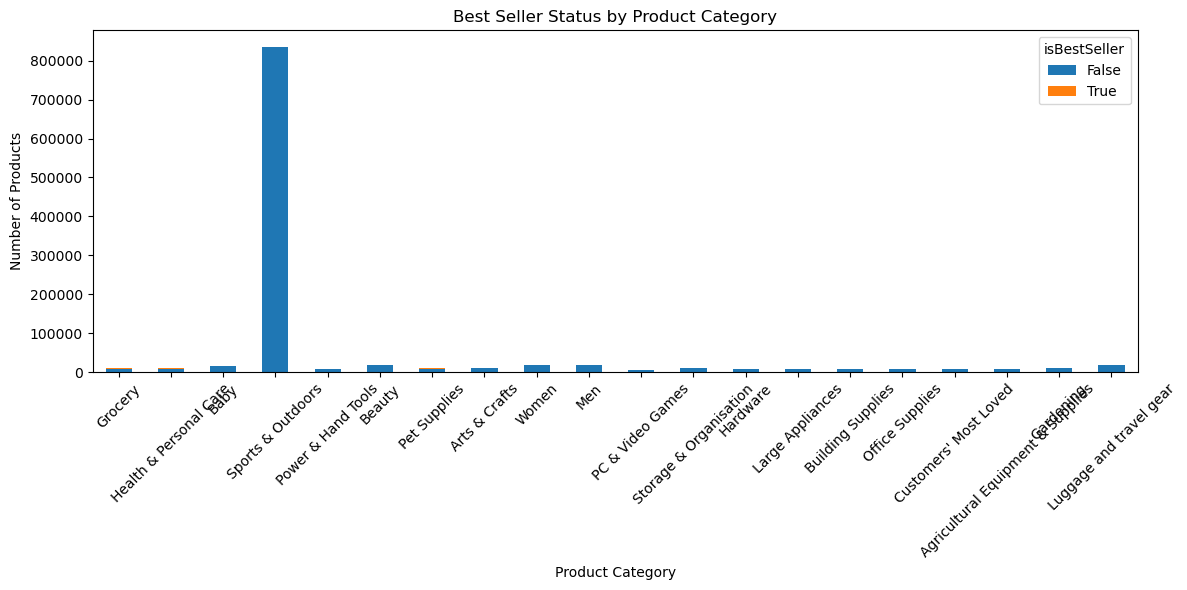

In [51]:
import matplotlib.pyplot as plt

# Create the stacked bar chart
sorted_crosstab.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Best Seller Status by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
# Part 2: Exploring Product Prices and Ratings Across Categories and Brands
# Objective: Investigate how different product categories influence product prices.

# Preliminary Step: Remove outliers in product prices.

# For this purpose, we can use the IQR (Interquartile Range) method. 
#Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times 
#the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

# Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [60]:
df.price.describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [84]:
x= df["category"].value_counts().head(20)

In [86]:
print(x)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Handmade Gifts                             18295
Handmade Home Décor                        18146
Luggage and travel gear                    18142
Handmade Jewellery                         18044
Handmade Artwork                           17878
Women                                      17772
Handmade Home & Kitchen Products           17435
Handmade Kitchen & Dining                  17432
Men                                        17417
Baby                                       15050
Name: count

In [91]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers

In [96]:
# Your code goes here
data_series = df['price']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
print(outliers)
df.iloc[~outliers.index,:] # ~ = NOT

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2443640,2828581,B0BX2KM9KQ,Motorcycle Socks 2 Pairs I'd Rather be on My M...,0.0,0,10.99,False,0,Motorbike Clothing
2443631,2828572,B01N1GW57Z,WULFSPORT LINEAR MOTORBIKE KIDS RACE SUIT New ...,5.0,4,60.62,False,0,Motorbike Clothing
2443625,2828566,B095K5HFZ7,SHIMA SX-2 EVO LADY Motorbike Shoes for Women ...,4.6,170,99.95,False,0,Motorbike Clothing
2443622,2828563,6040458925,starlingukpk Quality Flexible Motorbike Motorc...,4.2,2,9.99,False,0,Motorbike Clothing
2443619,2828560,B07JLZB7YY,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing
...,...,...,...,...,...,...,...,...,...
31,32,B08MQRDDYB,"Echo Show 15 | Full HD 15.6"" smart display wit...",4.4,2616,199.99,False,0,Hi-Fi Speakers
23,24,B09HGRXXTM,JBL Flip 6 Portable Bluetooth Speaker with 2-w...,4.7,8700,98.95,False,0,Hi-Fi Speakers
12,13,B09ZXDMNCY,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


In [98]:
df.price.describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [101]:
Q3 = df['price'].quantile(0.75)
Q1 = df['price'].quantile(0.25)
IQR = Q3 - Q1
lower_wisker = Q1 - 1.5*IQR
upper_wisker = Q3 + 1.5*IQR
list(df.columns).index('price')
lower_outliers_indexes = df[ df['price'] <  lower_wisker].index
upper_outliers_indexes = df[ df['price'] >  upper_wisker].index
# Replace the value of the upper_outliers with the value of the upper wisker
# Replace the value of the lower_outliers with the value of the lower wisker
df.iloc[lower_outliers_indexes,list(df.columns).index('price')] = lower_wisker
df.iloc[upper_outliers_indexes,list(df.columns).index('price')] = upper_wisker

In [103]:
df.price.describe()

count    2.443651e+06
mean     3.367770e+01
std      3.233202e+01
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      9.999000e+01
Name: price, dtype: float64

/var/folders/tn/xjfvdsqn1_d879f1bppyx1xh0000gn/T/ipykernel_12899/3698136394.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='price', data=df_top10, palette='coolwarm')


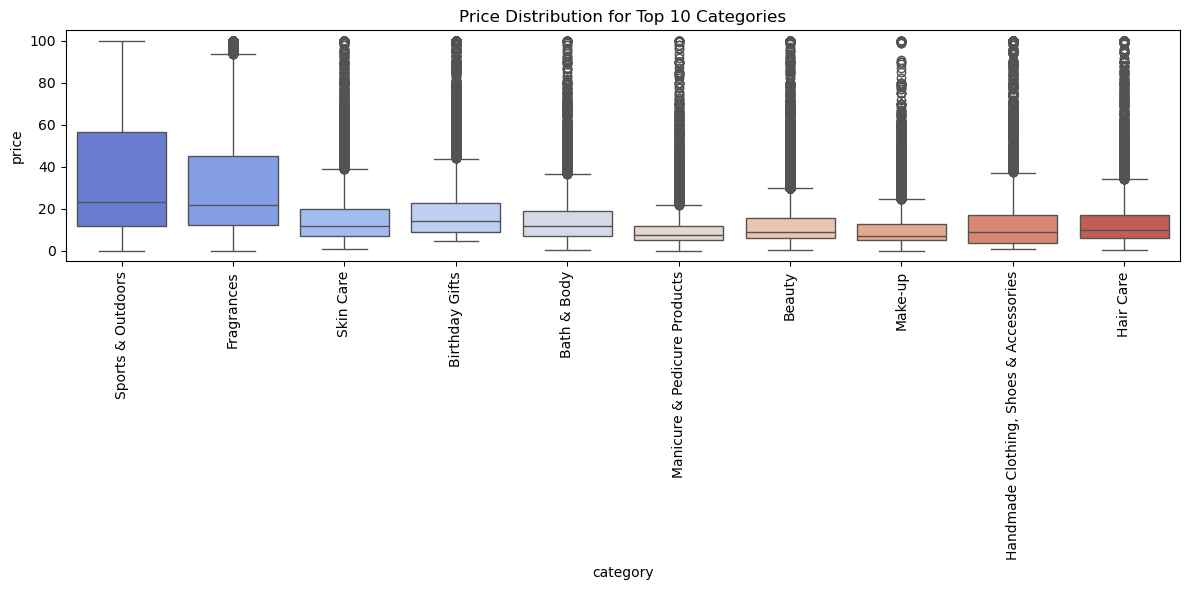

In [146]:
# Plotting a box plot to visualize the spread and outliers of 'Prices' for each  category, using the "coolwarm" color palette
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 categories
top_10_categories = df['category'].value_counts().head(10).index.tolist()

# Filter the DataFrame
df_top10 = df[df['category'].isin(top_10_categories)]

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='price', data=df_top10, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Price Distribution for Top 10 Categories')
plt.tight_layout()
plt.show()


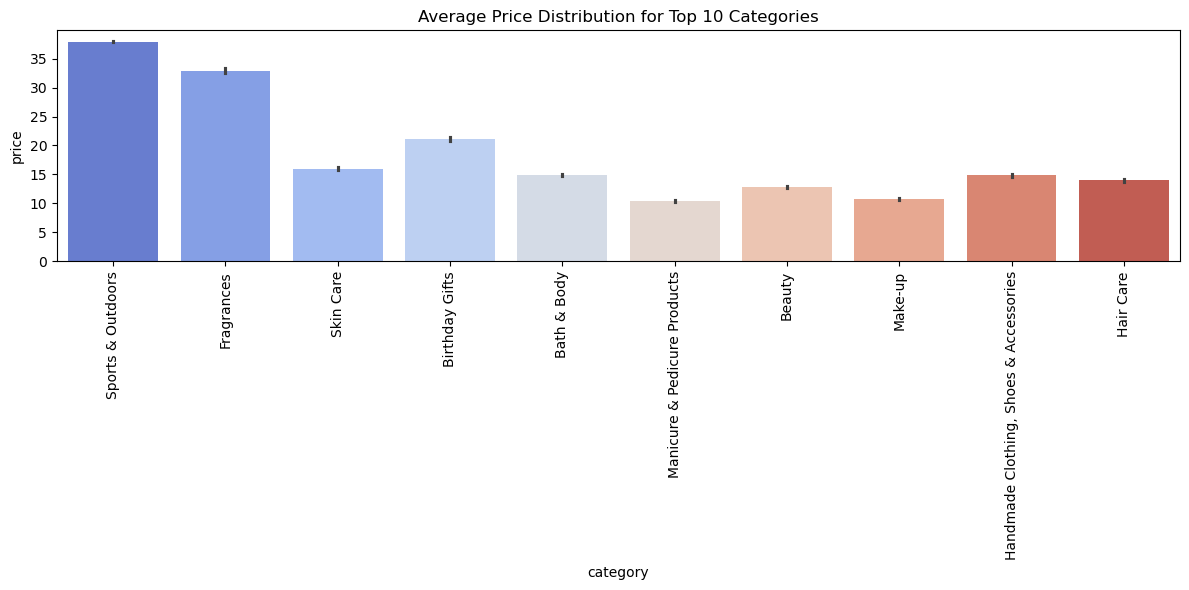

In [151]:
# Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
# Which product category tends to have the highest median price? Don't filter here by top categories.
# Get the top 10 categories
top_10_categories = df['category'].value_counts().head(10).index.tolist()

# Filter the DataFrame
df_top10 = df[df['category'].isin(top_10_categories)]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top10, x='category', y='price', palette="coolwarm", hue='category', legend=False);

plt.xticks(rotation=90)
plt.title('Average Price Distribution for Top 10 Categories')
plt.tight_layout()
plt.show()

/var/folders/tn/xjfvdsqn1_d879f1bppyx1xh0000gn/T/ipykernel_12899/4242657553.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top10, x='category', y='price', palette="coolwarm")


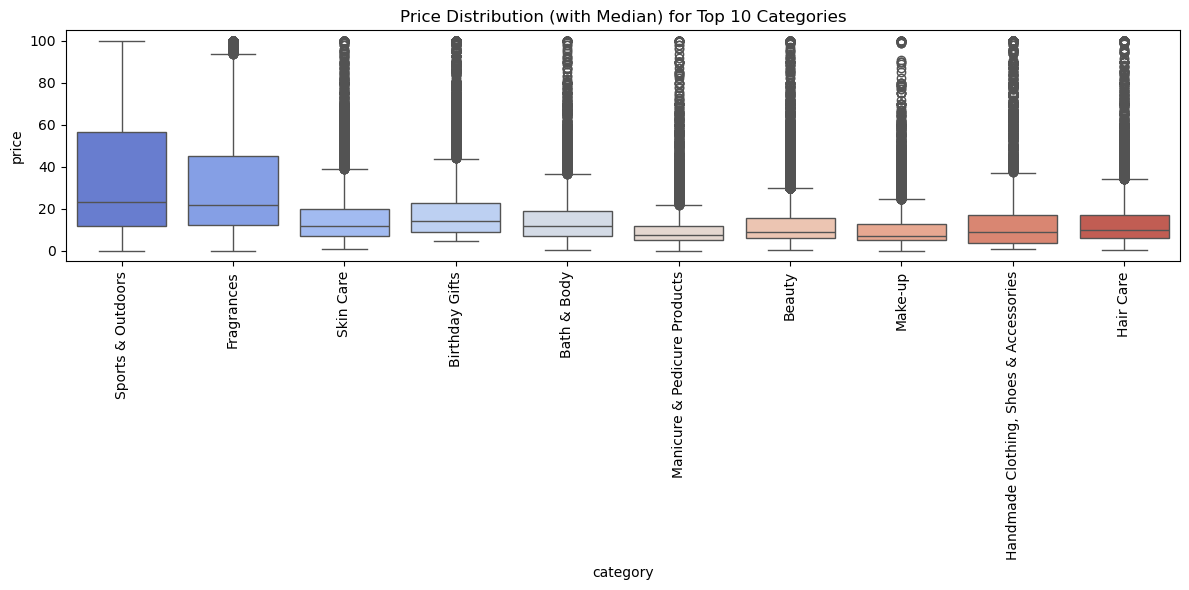

In [155]:
# Sport and Outdoors have the highest median
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top10, x='category', y='price', palette="coolwarm")
plt.xticks(rotation=90)
plt.title('Price Distribution (with Median) for Top 10 Categories')
plt.tight_layout()
plt.show()

In [161]:
df.stars.value_counts() #rating.value_counts()

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

In [ ]:
# Visualize the distribution of product ratings based on their category using side-by-side box plots.
# Filter out the top 10 categories based on count for better visualization.
# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

/var/folders/tn/xjfvdsqn1_d879f1bppyx1xh0000gn/T/ipykernel_12899/2553011508.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top10, x='category', y='stars', palette="coolwarm")


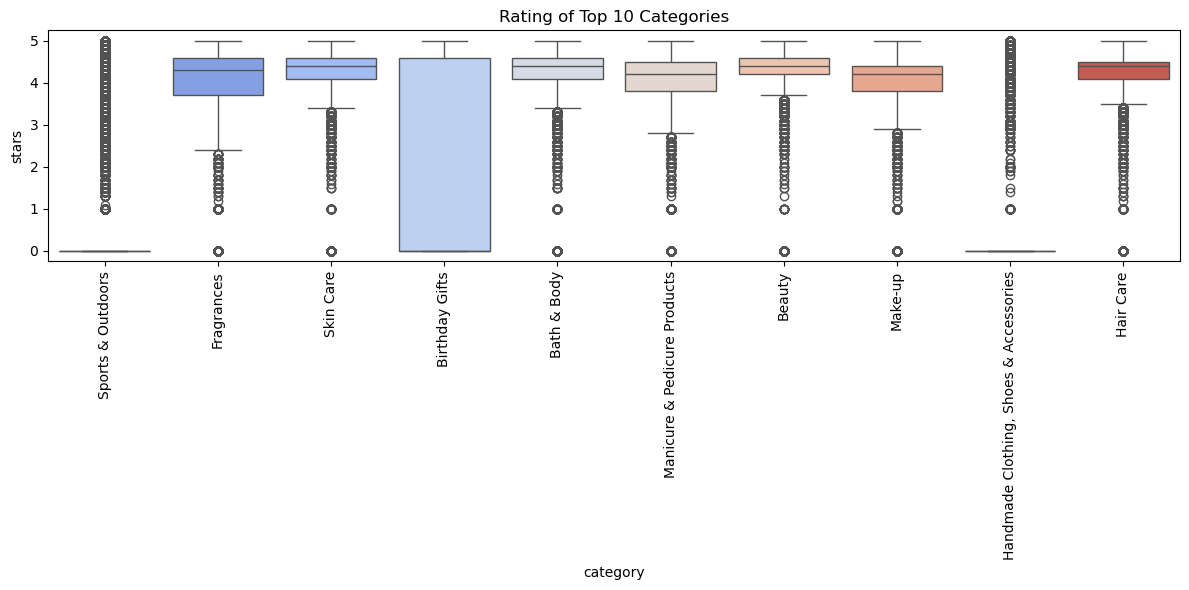

In [167]:
# Beauty has and hir care have the highes median
df_top10_filtered = df_top10[df_top10['stars'] > 0]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top10, x='category', y='stars', palette="coolwarm")
plt.xticks(rotation=90)
plt.title('Rating of Top 10 Categories')
plt.tight_layout()
plt.show()

In [170]:
# Correlation Coefficients:
# it is not significant
# Calculate the correlation coefficient between price and stars.
# Is there a significant correlation between product price and its rating?
correlation = df['price'].corr(df['stars'], method='spearman')
correlation

-0.12968279503708532

In [172]:
# Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
# Use a correlation heatmap to visualize correlations between all numerical variables.
# Examine if product prices typically follow a normal distribution using a QQ plot.

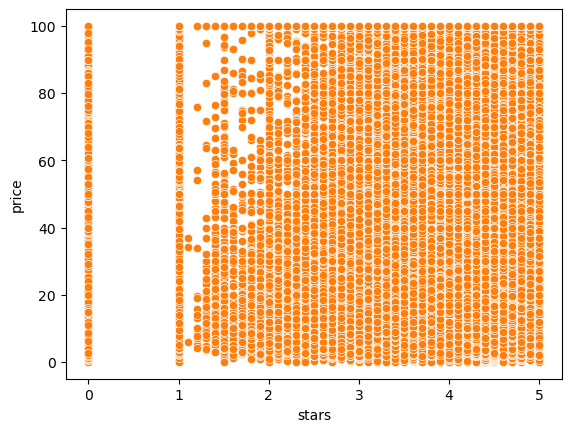

In [177]:
# Plotting a scatter plot to visualize the relationship between 'rating' and 'price'
sns.scatterplot(data=df, x='stars', y='price');
plt.show()

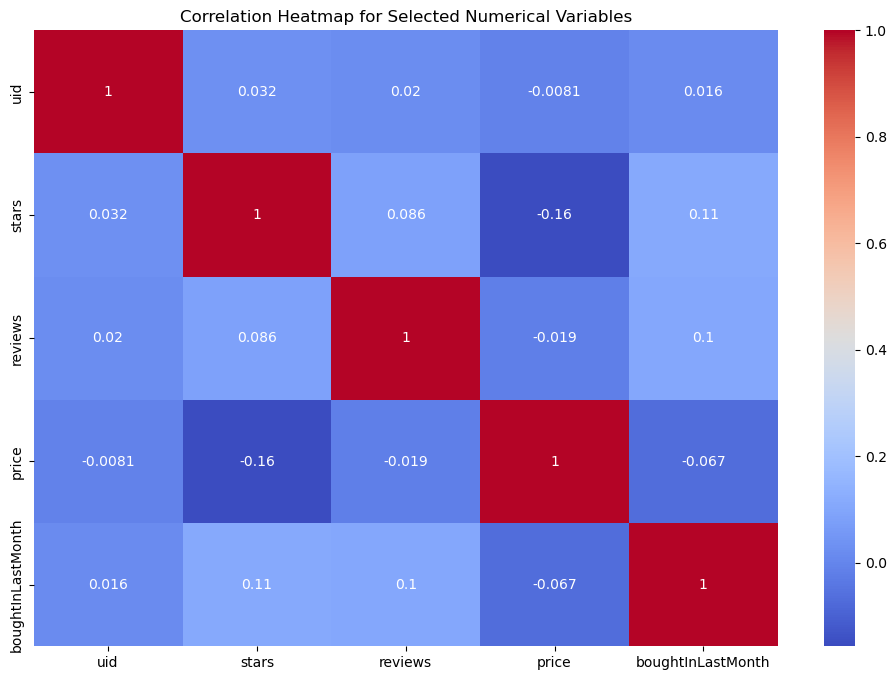

In [185]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(12, 8))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

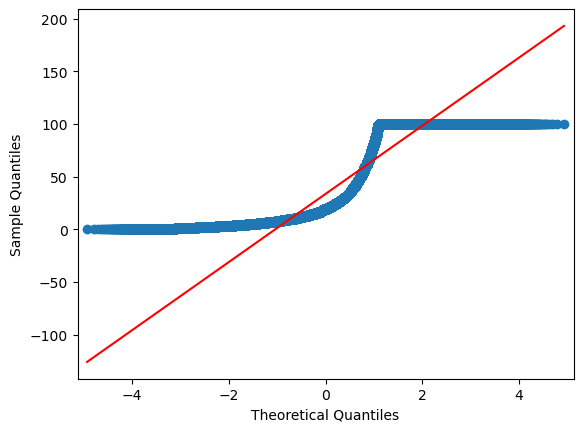

In [192]:
# Examine if product prices typically follow a normal distribution using a QQ plot.
# it is not mormally distributed
import statsmodels.api as sm

# Generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');
plt.show()